In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
names = ['id', 'limit_bal','sex','education','marriage','age','pay_september','pay_august','pay_july','pay_june','pay_may','pay_april','bill_september','bill_august','bill_july','bill_june','bill_may','bill_april','pay_amt_september','pay_amt_august','pay_amt_july','pay_amt_june','pay_amt_may','pay_amt_april','default']
df1 = pd.read_csv('../default of credit card clients.csv', names=names)
df = df1[2:]
df.head()

,id,limit_bal,sex,education,marriage,age,pay_september,pay_august,pay_july,pay_june,...,bill_june,bill_may,bill_april,pay_amt_september,pay_amt_august,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,default
2,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
3,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
4,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
5,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
6,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [40]:
#finding missing values
df.isnull().values.ravel().sum()

0

C:\Users\YURAJ\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


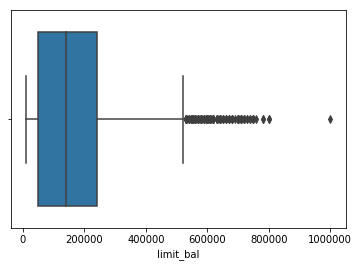

In [41]:
#finding outliers
df['limit_bal'] = pd.to_numeric(df['limit_bal'])
sns.boxplot(x=df["limit_bal"])
plt.show()

In [42]:
df["limit_bal"].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: limit_bal, dtype: float64

In [43]:
q = df["limit_bal"].quantile(0.99)
#cont = df[(df['limit_bal']>q)]
print q

500000.0


In [44]:
#removing outliar from df
#df = df.drop(df.index[df.limit_bal > q])

In [45]:
#df.count()

In [51]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.99)
    q3 = df_in[col_name].quantile(0.99)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

remove_outlier(df, 'limit_bal')
df.count()

id                   30000
limit_bal            30000
sex                  30000
education            30000
marriage             30000
age                  30000
pay_september        30000
pay_august           30000
pay_july             30000
pay_june             30000
pay_may              30000
pay_april            30000
bill_september       30000
bill_august          30000
bill_july            30000
bill_june            30000
bill_may             30000
bill_april           30000
pay_amt_september    30000
pay_amt_august       30000
pay_amt_july         30000
pay_amt_june         30000
pay_amt_may          30000
pay_amt_april        30000
default              30000
dtype: int64